In [1]:
! pip install pycaret

     |████████████████████████████████| 194kB 2.6MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 389kB 4.6MB/s 
     |████████████████████████████████| 102kB 5.0MB/s 
     |████████████████████████████████| 266kB 6.5MB/s 
     |████████████████████████████████| 63.9MB 66kB/s 
     |████████████████████████████████| 7.0MB 47.8MB/s 
     |████████████████████████████████| 1.2MB 46.8MB/s 
     |████████████████████████████████| 1.6MB 44.8MB/s 
     |████████████████████████████████| 3.1MB 45.3MB/s 
     |████████████████████████████████| 133kB 50.9MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 235kB 50.6MB/s 
     |████████████████████████████████| 2.1MB 38.1MB/s 
     |████████████████████████████████| 552kB 42.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 6.2MB 43.3MB/s 
     |████████████████████████████████| 614kB 40.2MB/s 
   

In [2]:
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd
import numpy as np

Colab mode activated.


In [3]:
df=pd.read_csv('/content/mls_10.csv')

In [5]:
df.shape

(12505, 38)

In [6]:
from pycaret.regression import *

In [7]:
df=df.drop(columns=['CloseDate', 'CurrentPrice', 'ListPrice', 'ElementarySchoolName', 'HighSchoolName', 'AssociationType', 'LotSize', 'Occupancy', 'PropertySubType', 'MLSNumber', 'StreetSuffix', 'ArchitecturalStyle', 'TaxLegalDescription', 'RATIO_ClosePrice_By_ListPrice', 'RATIO_ClosePrice_By_OriginalListPrice', 'RATIO_CurrentPrice_By_SQFT', 'SellerType', 'SeniorHighSchoolName', 'MiddleSchoolName', 'StreetDirPrefix', 'StreetDirSuffix', 'StreetName', 'StreetNumber', 'SchoolDistrict', 'City'])
# df.info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12505 entries, 0 to 12504
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PostalCode           12505 non-null  int64  
 1   BathsTotal           12505 non-null  float64
 2   BedsTotal            12505 non-null  float64
 3   ClosePrice           12505 non-null  float64
 4   DOM                  12505 non-null  float64
 5   NumberOfDiningAreas  12505 non-null  float64
 6   NumberOfLivingAreas  12505 non-null  float64
 7   NumberOfStories      12505 non-null  float64
 8   OriginalListPrice    12505 non-null  float64
 9   ParkingSpacesGarage  12505 non-null  float64
 10  PoolYN               12505 non-null  bool   
 11  SqFtTotal            12505 non-null  float64
 12  YearBuilt            12505 non-null  float64
dtypes: bool(1), float64(11), int64(1)
memory usage: 1.2 MB


In [9]:

s = setup(df, target = 'ClosePrice', session_id = 123, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(12505, 13)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,10421.523700,727361338.472400,26648.382400,0.957400,0.104200,0.169000
1,Light Gradient Boosting Machine,10830.846000,784422309.871800,27680.625800,0.953900,0.113600,0.170500
2,Extreme Gradient Boosting,10684.372000,811009701.240300,28080.729200,0.952500,0.108300,0.169000
3,Random Forest,10697.556000,840445300.621700,28483.678900,0.950900,0.106700,0.169500
4,Gradient Boosting Regressor,10733.478200,839676657.284600,28502.127900,0.950900,0.109900,0.168900
5,Extra Trees Regressor,12020.750600,940427011.962100,30270.195500,0.944900,0.111700,0.176000
6,Decision Tree,14116.201000,1450832380.884700,37064.305500,0.914900,0.164800,0.177400
7,AdaBoost Regressor,24117.863600,1704654117.876000,41186.080200,0.898900,0.175200,0.236700
8,K Neighbors Regressor,40732.938500,3561117768.193300,59564.896000,0.788500,0.229200,0.265600
9,Bayesian Ridge,51188.911400,5489042710.928600,74000.232300,0.673500,0.270600,0.301300


In [11]:
catboost=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10329.6384,8.511942e+08,29175.2331,0.9520,0.0777,0.0400
1,11237.6111,8.169893e+08,28583.0248,0.9515,0.0855,0.0424
2,9914.0621,4.623610e+08,21502.5813,0.9711,0.0790,0.0423
3,9935.3124,5.476628e+08,23402.1965,0.9668,0.0660,0.0384
4,9535.8224,5.091759e+08,22564.9266,0.9666,0.1800,0.2036
5,11019.9218,1.015917e+09,31873.4541,0.9427,0.0845,0.0412
6,10282.8376,4.990815e+08,22340.1331,0.9698,0.0768,0.0402
7,10870.4410,6.662836e+08,25812.4702,0.9585,0.2440,1.1653
8,10797.7856,1.191205e+09,34513.8405,0.9376,0.0809,0.0383
9,10291.8050,7.137427e+08,26715.9636,0.9577,0.0676,0.0385


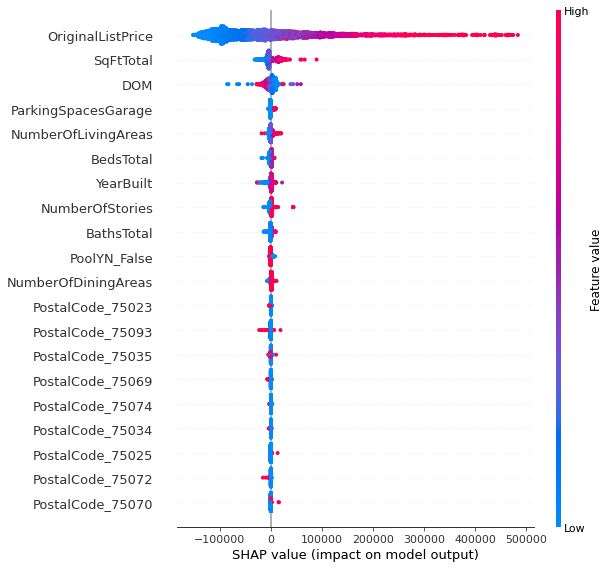

In [12]:
interpret_model(catboost)

In [14]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10624.3369,8.132390e+08,28517.3454,0.9541,0.0874,0.0435
1,11969.0479,1.015806e+09,31871.7188,0.9397,0.1001,0.0454
2,10692.0328,6.303504e+08,25106.7802,0.9606,0.0958,0.0464
3,10605.3536,7.550108e+08,27477.4607,0.9542,0.0985,0.0419
4,9673.6355,5.099926e+08,22583.0156,0.9665,0.1802,0.2050
5,11528.2312,1.200884e+09,34653.7702,0.9323,0.0949,0.0434
6,10098.9790,4.057643e+08,20143.5910,0.9754,0.0726,0.0407
7,11397.1281,7.438001e+08,27272.6988,0.9537,0.2435,1.1566
8,11077.1913,1.063440e+09,32610.4301,0.9443,0.0869,0.0415
9,10642.5236,7.059355e+08,26569.4469,0.9581,0.0757,0.0407


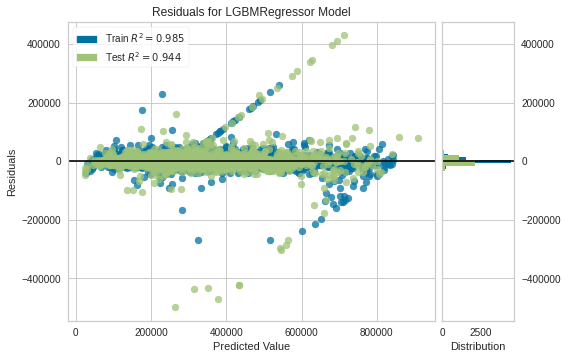

In [15]:
plot_model(lightgbm)

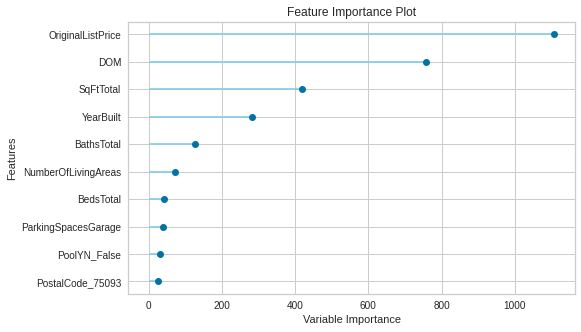

In [16]:
plot_model(lightgbm, plot='feature')

In [23]:
save_model(lightgbm, 'deployment_1.pkl')

Transformation Pipeline and Model Succesfully Saved


In [17]:
xgboost=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11371.3628,1.156300e+09,34004.4142,0.9348,0.0961,0.0450
1,11588.5216,1.114358e+09,33382.0016,0.9339,0.1008,0.0420
2,10415.2401,6.615500e+08,25720.6139,0.9587,0.0805,0.0428
3,9895.3371,6.173916e+08,24847.3668,0.9626,0.0705,0.0381
4,9570.6614,5.076081e+08,22530.1587,0.9667,0.1803,0.2050
5,11577.5809,1.085232e+09,32942.8603,0.9388,0.0882,0.0439
6,10074.7956,4.730298e+08,21749.2486,0.9714,0.0727,0.0395
7,11135.0662,6.620430e+08,25730.1965,0.9588,0.2444,1.1573
8,10717.8889,1.179286e+09,34340.7411,0.9383,0.0816,0.0379
9,10497.2659,6.532978e+08,25559.6901,0.9612,0.0677,0.0389


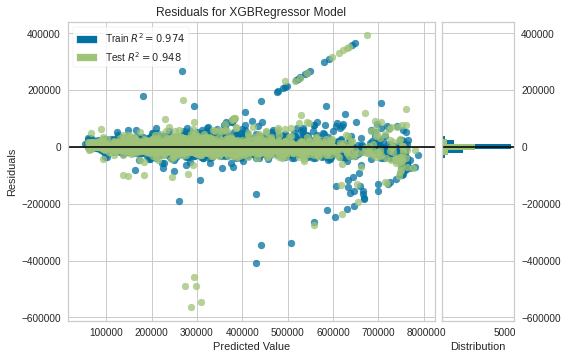

In [18]:
plot_model(xgboost)

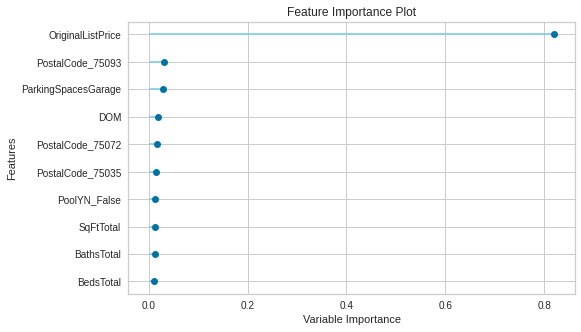

In [19]:
plot_model(xgboost, plot='feature')

In [20]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11742.3057,1.409405e+09,37542.0399,0.9205,0.1149,0.0456
1,11676.7395,1.153512e+09,33963.3939,0.9316,0.0990,0.0423
2,10440.8367,6.296937e+08,25093.6974,0.9607,0.0779,0.0424
3,10066.9539,6.485314e+08,25466.2793,0.9607,0.0720,0.0385
4,9472.8894,4.959271e+08,22269.4216,0.9674,0.1807,0.2046
5,11560.9927,1.115617e+09,33400.8468,0.9371,0.0917,0.0443
6,10337.9088,5.261352e+08,22937.6364,0.9682,0.0714,0.0398
7,11157.0682,6.590326e+08,25671.6295,0.9589,0.2436,1.1559
8,10594.9079,1.133387e+09,33665.8192,0.9407,0.0811,0.0377
9,10284.1788,6.255258e+08,25010.5147,0.9629,0.0664,0.0380


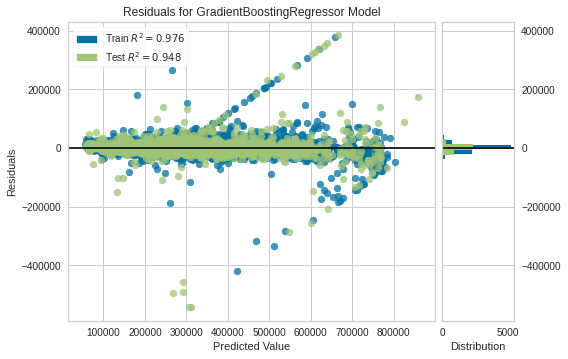

In [21]:
plot_model(gbr)

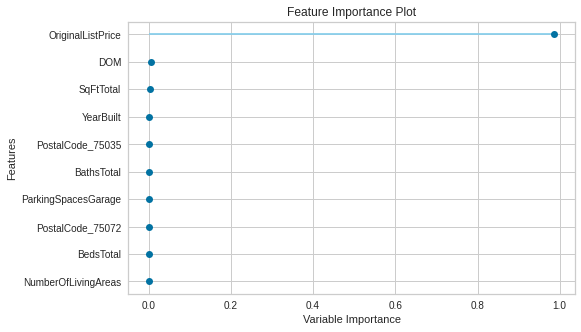

In [22]:
plot_model(gbr, plot='feature')